In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv(r'C:\Users\adity\OneDrive\Documents\Machine Learning\Project\Datasets\income.data.csv')
df 

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [ ]:
df.shape #dimansions of the dataset

(498, 3)

In [ ]:
df.columns #columns in the dataset

Index(['Unnamed: 0', 'income', 'happiness'], dtype='object')

In [ ]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


## **Data Cleaning**


In [ ]:
df.isnull().sum() #checking for null values

Unnamed: 0    0
income        0
happiness     0
dtype: int64

In [ ]:
df.duplicated().sum() #checking for duplicate values

np.int64(0)

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True) # dropping the unnecessary column

In [ ]:
df.describe().T # statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
income,498.0,4.466902,1.737527,1.506275,3.006256,4.423710,5.991913,7.481521
happiness,498.0,3.392859,1.432813,0.266044,2.265864,3.472536,4.502621,6.863388


income


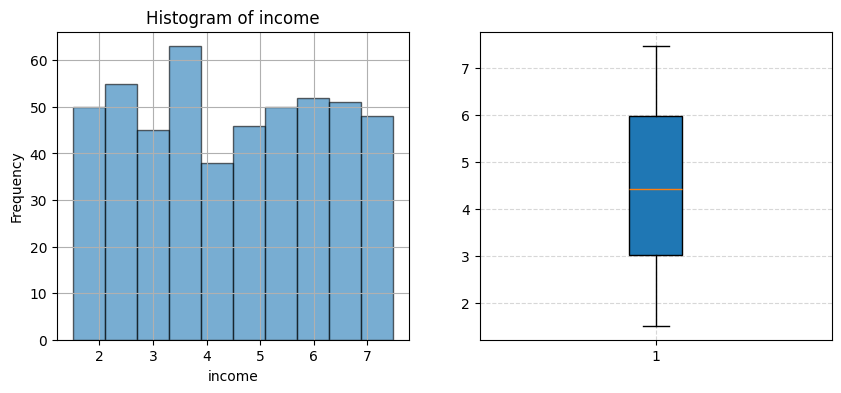

happiness


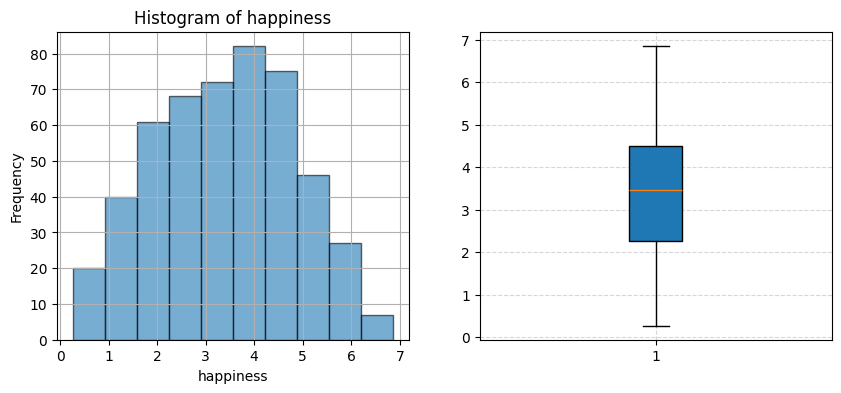

In [ ]:
for i in df.columns: 
    print(i) 
 
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    df[i].hist(edgecolor='black', alpha=0.6, orientation='vertical')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[i], vert=True, patch_artist=True)  

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show() 

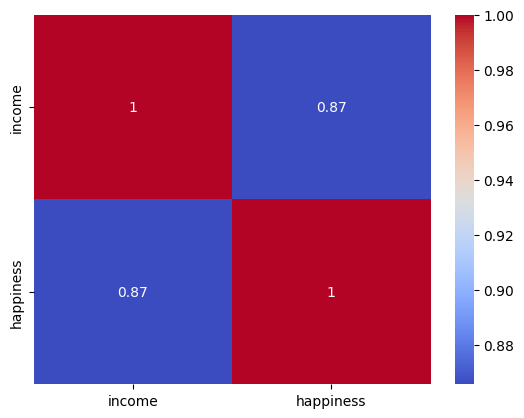

In [ ]:
corr = df.corr(method='pearson') 
sns.heatmap(corr, annot=True, cmap="coolwarm") 
plt.show()

## **Model Building**

In [ ]:
df.columns #columns in the dataset

Index(['income', 'happiness'], dtype='object')

In [ ]:
X = df[['income']] 
y = df[['happiness']] 

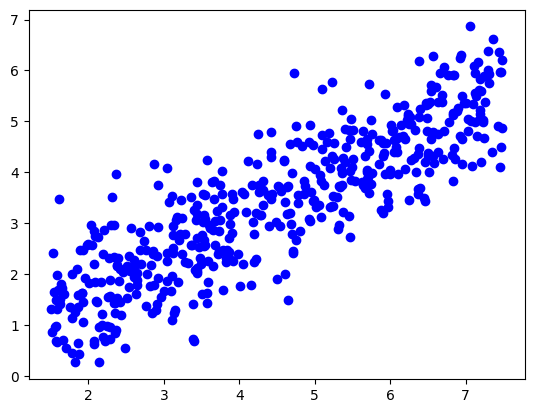

In [ ]:
plt.scatter(X, y, color='blue') 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) # Splitting the dataset into training and testing sets

In [ ]:
x_train # Training set features

,income
56,6.029214
227,7.300903
280,3.354252
485,6.101565
220,5.853906
...,...
106,7.176400
270,3.859892
348,5.693725
435,5.754941


In [ ]:
y_test # Testing set target variable

,happiness
487,4.754168
73,4.159609
231,2.295700
175,2.311554
237,2.861274
...,...
247,3.427723
383,3.835578
19,2.584729
321,2.842868


In [ ]:
model = LinearRegression() 
model.fit(x_train,y_train) # Fitting the linear regression model

LinearRegression()

In [ ]:
y_pred = model.predict(x_test) 
y_pred # Predictions on the test set

array([[3.21752987],
       [2.21792257],
       [3.20280332],
       [1.79020704],
       [1.74394749],
       [2.39018719],
       [4.44664262],
       [4.86010664],
       [1.89050708],
       [3.50456863],
       [4.09833273],
       [2.4318678 ],
       [2.85594355],
       [3.54519132],
       [2.78796716],
       [1.80768864],
       [2.52124048],
       [5.16673969],
       [2.45094439],
       [3.996441  ],
       [1.83486036],
       [2.72998006],
       [2.63135811],
       [1.23340488],
       [4.61112137],
       [1.72884986],
       [2.46409207],
       [5.3782968 ],
       [4.21884267],
       [4.12789401],
       [1.34529138],
       [3.72063824],
       [2.83545189],
       [3.71043375],
       [4.0008309 ],
       [4.01012804],
       [1.2713695 ],
       [2.47646914],
       [1.31859325],
       [2.24910091],
       [5.35598486],
       [4.42244764],
       [5.0893214 ],
       [4.83614181],
       [2.94122983],
       [2.15161714],
       [1.6263909 ],
       [3.168

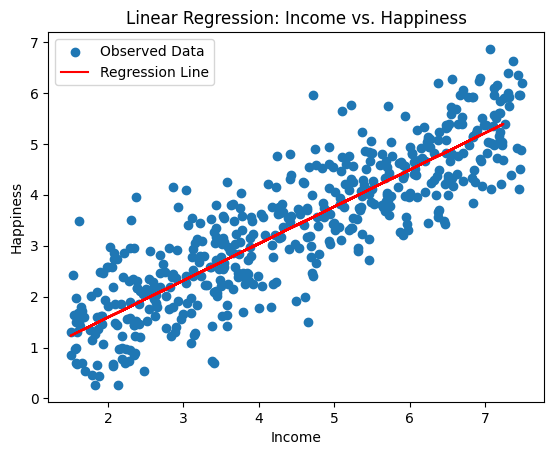

In [ ]:
plt.scatter(df['income'], df['happiness'], label='Observed Data') 

plt.plot(x_test, y_pred, color='r', label='Regression Line') 

plt.xlabel('Income') 
plt.ylabel('Happiness') 
plt.title('Linear Regression: Income vs. Happiness') 

plt.legend() # Displaying the legend
plt.show() 

In [ ]:
model = sm.OLS(y_train,x_train).fit() # Fitting the OLS model
print(model.summary()) # Summary of the OLS model

                                 OLS Regression Results                                
Dep. Variable:              happiness   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.045e+04
Date:                Thu, 05 Jun 2025   Prob (F-statistic):                   2.91e-287
Time:                        10:24:39   Log-Likelihood:                         -425.90
No. Observations:                 398   AIC:                                      853.8
Df Residuals:                     397   BIC:                                      857.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
mse=mean_squared_error(y_test,y_pred) # Mean Squared Error
mae=mean_absolute_error(y_test,y_pred) # Mean Absolute Error
r2= r2_score(y_test,y_pred)

print('Evaluation Metrics:')

print(f"mean_squared_error (MSE) : {mse:.2f}") 
print(f"mean_absolute_error (MAE) : {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Evaluation Metrics:
mean_squared_error (MSE) : 0.59
mean_absolute_error (MAE) : 0.6270
R-squared (R2): 0.6663


In [24]:
df["income"].max() # find the maximum value of income

np.float64(7.48152138059959)

In [25]:
df["happiness"].max() # find the maximum value of happiness

np.float64(6.86338795095807)